In [1]:
# CS269 demo (Author: ArjunAkula)

import torch

from transformers import BertTokenizer
from PIL import Image
import argparse

from datasets import coco, utils
from configuration import Config
from models import utils, caption

from IPython.display import display
from PIL import Image

In [2]:
config = Config()
model, criterion = caption.build_model(config)
#checkpoint = torch.load('checkpoint.pth')
checkpoint = torch.load('/home/arjunakula/ck_latest.pth')
model.load_state_dict(checkpoint['model'])
model.eval()


Caption(
  (backbone): Joiner(
    (0): Backbone(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d()
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d()
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d()
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): FrozenBatchNorm2d()
            (relu): ReLU(inplace=True)
            (downsample): Sequential(
              (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): FrozenBatchNorm2d()
            )
 

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

start_token = tokenizer.convert_tokens_to_ids(tokenizer._cls_token)
end_token = tokenizer.convert_tokens_to_ids(tokenizer._sep_token)


In [4]:
def create_caption_and_mask(start_token, max_length):
    caption_template = torch.zeros((1, max_length), dtype=torch.long)
    mask_template = torch.ones((1, max_length), dtype=torch.bool)

    caption_template[:, 0] = start_token
    mask_template[:, 0] = False

    return caption_template, mask_template


caption, cap_mask = create_caption_and_mask(
    start_token, config.max_position_embeddings)


In [5]:
@torch.no_grad()
def evaluate(image):
    model.eval()
    for i in range(config.max_position_embeddings - 1):
        predictions = model(image, caption, cap_mask)
        predictions = predictions[:, i, :]
        predicted_id = torch.argmax(predictions, axis=-1)

        if predicted_id[0] == 102:
            return caption

        caption[:, i+1] = predicted_id[0]
        cap_mask[:, i+1] = False

    return caption


In [24]:
entries = os.listdir('/home/arjunakula/Downloads/test/')
print(entries[0])

cnt = 0
for entry in entries:
    if cnt == 500:
        break
    cnt += 1
    image_path = '/home/arjunakula/Downloads/test/'+entry
    image = Image.open(image_path)
    image = coco.val_transform(image)
    image = image.unsqueeze(0)

    output = evaluate(image)
    result = tokenizer.decode(output[0].tolist(), skip_special_tokens=True)
    print(image_path," <sep> ",result.capitalize())

VizWiz_test_00004184.jpg
/home/arjunakula/Downloads/test/VizWiz_test_00004184.jpg  <sep>  A frisbee laying on the ground in the dirt.
/home/arjunakula/Downloads/test/VizWiz_test_00004361.jpg  <sep>  A person is holding a suitcase with a person standing in the background.
/home/arjunakula/Downloads/test/VizWiz_test_00007911.jpg  <sep>  A green train is on the tracks near a fence. the background.
/home/arjunakula/Downloads/test/VizWiz_test_00006087.jpg  <sep>  Two pairs of scissors sitting on a black suitcase.. the background.
/home/arjunakula/Downloads/test/VizWiz_test_00007015.jpg  <sep>  A piece of paper with a book on it.. the background.
/home/arjunakula/Downloads/test/VizWiz_test_00005224.jpg  <sep>  A close up of a computer screen with a map. the background.
/home/arjunakula/Downloads/test/VizWiz_test_00001014.jpg  <sep>  A close up of a bottle of a bottle map. the background.
/home/arjunakula/Downloads/test/VizWiz_test_00005746.jpg  <sep>  A laptop computer sitting on top of a ta

KeyboardInterrupt: 

/home/arjunakula/Documents/randomexamples/1.png  <sep>  A package of paper with a book in the background.


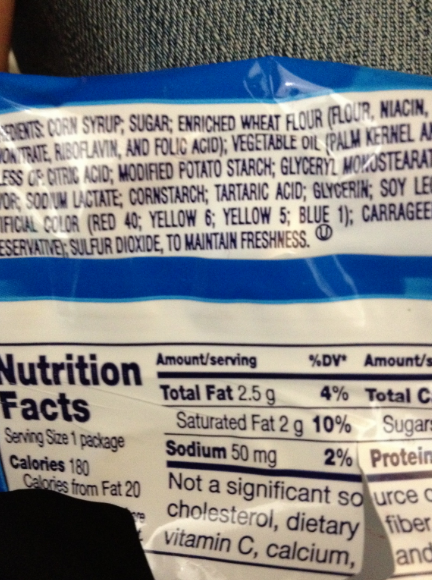

In [9]:
image_paths = ['/home/arjunakula/Documents/randomexamples/1.png']

for image_path in image_paths:
    image = Image.open(image_path)
    image = coco.val_transform(image)
    image = image.unsqueeze(0)

    output = evaluate(image)
    result = tokenizer.decode(output[0].tolist(), skip_special_tokens=True)
    print(image_path," <sep> ",result.capitalize())

    display(Image.open(image_path))


In [28]:
# Convert Captions to Questions
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True